# 051730308于浩
## 作业2：ADAMS和RK4数值积分的实现
仿照run_euler函数的实现，在modsim中实现Adams和四阶Runge-Kutta法，并使用炮弹发射仿真比较Euler、Adams和RK4三种数值积分的精度。实现run_adams和run_rk4函数。

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# 1.四阶adams算法的实现

In [2]:
def run_adams(system,slope_func):
 
    frame,details=run_euler(system,slope_func)
    ts=linrange(t_0+dt*3,t_end,dt)
    system.t_end=t_end
    
    for t1 in ts:
        y1=frame.row[round(t1,2)]
        slopes=slope_func(y1,round(t1,2),system)
        y2=[y+55/24*slope*dt for y,slope in zip(y1,slopes)]
        
        y1=frame.row[round(t1-dt,2)]
        slopes=slope_func(y1,round(t1-dt,2),system)
        y2=[y-59/24*slope*dt for y,slope in zip(y2,slopes)]
        
        y1=frame.row[round(t1-dt*2,2)]
        slopes=slope_func(y1,round(t1-dt*2,2),system)
        y2=[y+37/24*slope*dt for y,slope in zip(y2,slopes)]
        
        y1=frame.row[round(t1-dt*3,2)]
        slopes=slope_func(y1,round(t1-dt*3,2),system)
        y2=[y-9/24*slope*dt for y,slope in zip(y2,slopes)]
        
        t2=round(t1+dt,2)
        frame.row[t2]=y2
    return frame


# 2.四阶RK算法

In [3]:
def run_rk4(system,slope_func):
    init, t_0, t_end, dt = system.init, system.t_0,system.t_end, system.dt
    
    frame,details=run_euler(system,slope_func)
    ts=linrange(t_0+dt*3,t_end,dt)
    
    for t1 in ts:
        y1=frame.row[t1]
        slopes=slope_func(y1,t1,system)
        y_0=[y+1/6*slope*dt for y,slope in zip(y1,slopes)]
        
        y2=[y+1/6*slope*dt/2 for y,slope in zip(y1,slopes)]
        slopes=slope_func(y2,t1+dt/2,system)
        y_0=[y+2/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        y3=[y+2/6*slope*dt/2 for y,slope in zip(y1,slopes)]
        slopes=slope_func(y3,t1+dt/2,system)
        y_0=[y+2/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        y4=[y+2/6*slope*dt for y,slope in zip(y1,slopes)]
        slopes=slope_func(y4,t1+dt,system)
        y_0=[y+1/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        t2=round(t1+dt,2)
        frame.row[t2]=y_0

    return frame


# 3.采用三种方法进行仿真
## 初始条件

In [4]:
g = 9.8 
t_end = 5
dt = 1 
t_0 = 0
init_z = State(y=100.0, v=0.0)
init_x = State(y=0.0, v=500.0)
system_z = System(init=init_z, g=g, t_end=t_end,t_0=t_0, dt=dt)
system_x = System(init=init_x, t_end=t_end,t_0=t_0, dt=dt)

,values
init,y 0.0 v 500.0 dtype: float64
t_end,5
t_0,0
dt,1


## 斜率函数

In [5]:
def slope_func_z(state,t,system):
    y, v = state
    
    dydt = v
    dvdt = -system.g
    
    return dydt, dvdt

In [6]:
def slope_func_x(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = 0.0
    
    return dydt, dvdt

## (1)采用Euler法仿真

In [7]:
results_euler_z, details_euler_z = run_euler(system_z, slope_func_z)
results_euler_x, details_euler_x = run_euler(system_x, slope_func_x)

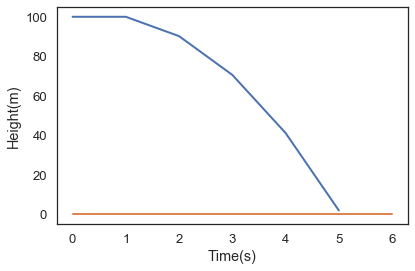

In [8]:
plot(results_euler_z.y)
decorate(xlabel='Time(s)',ylabel='Height(m)')
x=[0,1,2,3,4,5,6]
y=[0,0,0,0,0,0,0]
plot(x,y)   
#绘出高度随时间变化的曲线

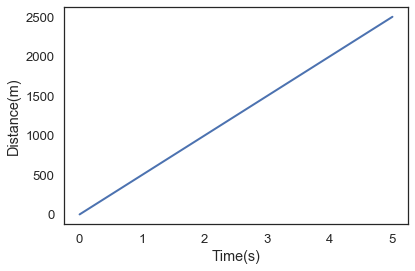

In [9]:
plot(results_euler_x.y)
decorate(xlabel='Time(s)',ylabel='Distance(m)')
##水平位移随时间的变化

## (2)采用adams法仿真

In [10]:
results_adams_z = run_adams(system_z, slope_func_z)
results_adams_x = run_adams(system_x, slope_func_x)

,y,v
0,0.0,500.0
1,500.0,500.0
2,1000.0,500.0
3,1500.0,500.0
4,2000.0,500.0
5,2500.0,500.0


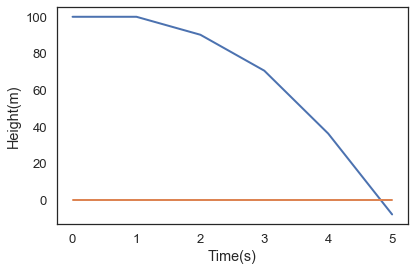

In [11]:
plot(results_adams_z.y)
decorate(xlabel='Time(s)',ylabel='Height(m)')
x=[0,1,2,3,4,5]
y=[0,0,0,0,0,0]
plot(x,y)
#高度随时间的变化

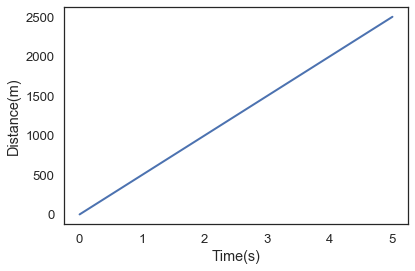

In [12]:
plot(results_adams_x.y)
decorate(xlabel='Time(s)',ylabel='Distance(m)')
#水平位移随时间的变化

## (3)采用四阶Runge-Kutta法仿真

In [13]:
results_RK_z = run_rk4(system_z, slope_func_z)
results_RK_x = run_rk4(system_x, slope_func_x)

,y,v
0,0.0,500.0
1,500.0,500.0
2,1000.0,500.0
3,1500.0,500.0
4,2000.0,500.0
5,2500.0,500.0


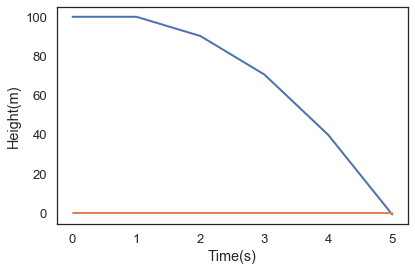

In [14]:
plot(results_RK_z.y)
decorate(xlabel='Time(s)',ylabel='Height(m)')
x=[0,1,2,3,4,5]
y=[0,0,0,0,0,0]
plot(x,y)
#高度随时间的变化

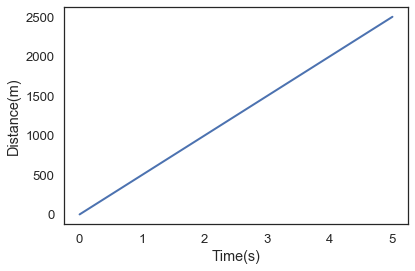

In [15]:
plot(results_RK_x.y)
decorate(xlabel='Time(s)',ylabel='Distance(m)')
#水平位移随时间的变化

## 将3种仿真方法得到的高度-时间曲线绘制在同一个图中进行比较

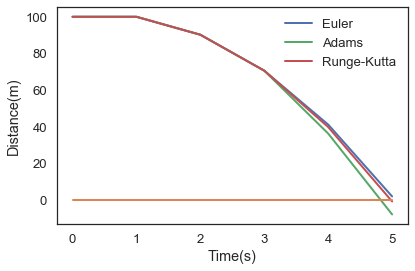

In [16]:
plot(results_euler_z.y,label='Euler')
plot(results_adams_z.y,label='Adams',color='C2')
plot(results_RK_z.y,label='Runge-Kutta',color='C3')
decorate(xlabel='Time(s)',ylabel='Distance(m)')
x=[0,1,2,3,4,5]
y=[0,0,0,0,0,0]
plot(x,y)

# 结论：
### 在本例中，根据直接计算可得炮弹落地时间大约为4.52秒
### 根据三段曲线与Y=0的交点可以得出以下结论
### 三种数值积分的方法的仿真精度由高到低依次为：Adams，Runge-Kutte,Euler